<a href="https://colab.research.google.com/github/maddisurekha1234/surekha_INFO5731_-Fall2021/blob/main/In_class_exercise/In_class_exercise_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The third In-class-exercise (9/29/2021, 40 points in total)

The purpose of this exercise is to understand text representation.

Question 1 (10 points): Describe an interesting text classification or text mining task and explain what kind of features might be useful for you to build the machine learning model. List your features and explain why these features might be helpful. You need to list at least five different types of features.

In [ ]:
Text data is the most basic unstructured type of information.Methods and algorithms are required to effectively use the information extracted from the text data in a variety of applications.
I would like to perform the text mining procedures and perform feature extraction on IMDB movie reviews data.I would like to perform various feature extraction 
methods and measure certain distinct properties of our data in order to achieve dimensionality reduction.It is analysed for determining the effective of these techinques 
for achieving high performanceof learning algorithm.Because this ultimatly improves prediction accuracy of the classifer.

I would like to use Part-of-speech (POS) extraction techine which is a special lable assigned to each token in word in a text corpus to indicate the part of speech
and often also other grammitical categories such as tense,number,case etc.

Below are the feature extraction which I would like to perform on the dataset.
Number of Adjective - This feature gives output the number of adjectives in each sentence.
Number of Adverbs - This feature gives the number of afverbs in each sentence.
Number of Coordinating conjuctions - A coordinating conjuction is a word that links words expresses a semantic relationship between them.
Number of Interjections - An interjection is a form ,typically brief, which is used most often as a part of exclmation
Number of Nouns - Nouns are a part of speech  typically denoating a person.
Number of verbs - Verb is a member of the syntactic class of words typicaaly denoting the events.
Number of personal pronouns - These are words which subsitute the nouns.

How these features will be useful in building machine learning models:
They are machine learning models where POS features are very useful and plays important role.Semantic analysis,named entity recognition,statitical lamguage 
models based on the freq of different tags,Text generation by models with POS tagged datasets,Pattern identification in corpus datasets.








Question 2 (20 points): Write python code to extract these features you discussed above. You can collect a few sample text data for the feature extraction. 

In [1]:

!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium



Get:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:6 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:7 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:8 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:9 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:13 https://developer.download.nvidia.co

In [2]:
from selenium import webdriver
options = webdriver.ChromeOptions()
options.add_argument('-headless')
options.add_argument('-no-sandbox')
options.add_argument('-disable-dev-shm-usage')

from selenium.webdriver.support.ui import WebDriverWait as wait
from selenium.webdriver.common.by import By
import pandas as pd
import time

driver = webdriver.Chrome('chromedriver',options=options)
link = 'https://www.imdb.com/title/tt9376612/reviews?ref_=tt_sa_3'
array_title= []
array_review = []
driver.get(link)
for n in range(5):
  driver.find_element_by_class_name("ipl-load-more__button").click()
  time.sleep(5)
  listOfTitle = driver.find_elements(By.CLASS_NAME, "title")
  listOfReviews = driver.find_elements(By.CLASS_NAME, "text")
for ele, sub_ele in zip(listOfTitle, listOfReviews):
      array_title.append((ele.text).replace('\n',''))
      array_review.append(sub_ele.text)
df = pd.DataFrame(list(zip(array_title, array_review)), columns =['Title', 'Review'])
print("Length of data frame is {0}".format(len(df)))
df

Length of data frame is 150


,Title,Review
0,Who knew a superhero film could be so beautiful?,I'll start by saying that if you're looking fo...
1,something unique and fresh,After 10 years of almost every movie being.arm...
2,"Crouching Tiger, Hidden MARVEL . . . And So MU...","A -BIG- Screen Mini Review. Viewed Sept.05, 20..."
3,It's a Visual treat,Perfect Fantasy film to watch with full family...
4,Best non-avengers MCU movie,Keeping it short. This movie had it all. Great...
...,...,...
145,"Good Action, Weak Writing",
146,One of the best marvel films I've seen in years,"I loved the aesthetics of the movie, the score..."
147,The marvel universe,The marvel universe has excelled here .. pure ...
148,A new start and TOP TIER marvel movie.,Throw your expectations based on the marketing...


**Pre-Processing Data**

In [3]:
# Converting in to lower case
df['After_Preprocessing'] = df['Review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
print("After_converting in to lower case")
df

After_converting in to lower case


,Title,Review,After_Preprocessing
0,Who knew a superhero film could be so beautiful?,I'll start by saying that if you're looking fo...,i'll start by saying that if you're looking fo...
1,something unique and fresh,After 10 years of almost every movie being.arm...,after 10 years of almost every movie being.arm...
2,"Crouching Tiger, Hidden MARVEL . . . And So MU...","A -BIG- Screen Mini Review. Viewed Sept.05, 20...","a -big- screen mini review. viewed sept.05, 20..."
3,It's a Visual treat,Perfect Fantasy film to watch with full family...,perfect fantasy film to watch with full family...
4,Best non-avengers MCU movie,Keeping it short. This movie had it all. Great...,keeping it short. this movie had it all. great...
...,...,...,...
145,"Good Action, Weak Writing",,
146,One of the best marvel films I've seen in years,"I loved the aesthetics of the movie, the score...","i loved the aesthetics of the movie, the score..."
147,The marvel universe,The marvel universe has excelled here .. pure ...,the marvel universe has excelled here .. pure ...
148,A new start and TOP TIER marvel movie.,Throw your expectations based on the marketing...,throw your expectations based on the marketing...


In [4]:
#  Removing Punctuation
df['After_Preprocessing'] = df['After_Preprocessing'].str.replace('[^\w\s]','')
df

,Title,Review,After_Preprocessing
0,Who knew a superhero film could be so beautiful?,I'll start by saying that if you're looking fo...,ill start by saying that if youre looking for ...
1,something unique and fresh,After 10 years of almost every movie being.arm...,after 10 years of almost every movie beingarme...
2,"Crouching Tiger, Hidden MARVEL . . . And So MU...","A -BIG- Screen Mini Review. Viewed Sept.05, 20...",a big screen mini review viewed sept05 2021 __...
3,It's a Visual treat,Perfect Fantasy film to watch with full family...,perfect fantasy film to watch with full family...
4,Best non-avengers MCU movie,Keeping it short. This movie had it all. Great...,keeping it short this movie had it all great s...
...,...,...,...
145,"Good Action, Weak Writing",,
146,One of the best marvel films I've seen in years,"I loved the aesthetics of the movie, the score...",i loved the aesthetics of the movie the score ...
147,The marvel universe,The marvel universe has excelled here .. pure ...,the marvel universe has excelled here pure pu...
148,A new start and TOP TIER marvel movie.,Throw your expectations based on the marketing...,throw your expectations based on the marketing...


In [5]:
#  Removing Numbers
df['After_Preprocessing'] = df['After_Preprocessing'].apply(lambda x: ''.join([i for i in x if not i.isdigit()]))
df

,Title,Review,After_Preprocessing
0,Who knew a superhero film could be so beautiful?,I'll start by saying that if you're looking fo...,ill start by saying that if youre looking for ...
1,something unique and fresh,After 10 years of almost every movie being.arm...,after years of almost every movie beingarmed ...
2,"Crouching Tiger, Hidden MARVEL . . . And So MU...","A -BIG- Screen Mini Review. Viewed Sept.05, 20...",a big screen mini review viewed sept ________...
3,It's a Visual treat,Perfect Fantasy film to watch with full family...,perfect fantasy film to watch with full family...
4,Best non-avengers MCU movie,Keeping it short. This movie had it all. Great...,keeping it short this movie had it all great s...
...,...,...,...
145,"Good Action, Weak Writing",,
146,One of the best marvel films I've seen in years,"I loved the aesthetics of the movie, the score...",i loved the aesthetics of the movie the score ...
147,The marvel universe,The marvel universe has excelled here .. pure ...,the marvel universe has excelled here pure pu...
148,A new start and TOP TIER marvel movie.,Throw your expectations based on the marketing...,throw your expectations based on the marketing...


In [6]:
#  Removing special characters
import re
df['After_Preprocessing'] = df['After_Preprocessing'].apply(lambda x: ''.join(re.sub(r"[^a-zA-Z0-9]+", ' ', charctr) for charctr in x ))
df

,Title,Review,After_Preprocessing
0,Who knew a superhero film could be so beautiful?,I'll start by saying that if you're looking fo...,ill start by saying that if youre looking for ...
1,something unique and fresh,After 10 years of almost every movie being.arm...,after years of almost every movie beingarmed ...
2,"Crouching Tiger, Hidden MARVEL . . . And So MU...","A -BIG- Screen Mini Review. Viewed Sept.05, 20...",a big screen mini review viewed sept ...
3,It's a Visual treat,Perfect Fantasy film to watch with full family...,perfect fantasy film to watch with full family...
4,Best non-avengers MCU movie,Keeping it short. This movie had it all. Great...,keeping it short this movie had it all great s...
...,...,...,...
145,"Good Action, Weak Writing",,
146,One of the best marvel films I've seen in years,"I loved the aesthetics of the movie, the score...",i loved the aesthetics of the movie the score ...
147,The marvel universe,The marvel universe has excelled here .. pure ...,the marvel universe has excelled here pure pu...
148,A new start and TOP TIER marvel movie.,Throw your expectations based on the marketing...,throw your expectations based on the marketing...


In [7]:
#  Removing stop words
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all
       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Unzipping corpora/biocreative_ppi.zip.
       | Downloading package brown to /root/nltk_data...
       |   Unzipping corpora/brown.zip.
       | Downloading package brown_tei to /root/nltk_data...
       |   Unzipping corpora/brown_tei.zip.
       | Downloading package cess_cat to /root/nltk_data...
       |   Unzipping corpora/cess_cat.zip.
       | Downloading package cess_esp to /root/nltk_data...
 

True

In [8]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['After_Preprocessing'] = df['After_Preprocessing'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df

,Title,Review,After_Preprocessing
0,Who knew a superhero film could be so beautiful?,I'll start by saying that if you're looking fo...,ill start saying youre looking great story you...
1,something unique and fresh,After 10 years of almost every movie being.arm...,years almost every movie beingarmed combat one...
2,"Crouching Tiger, Hidden MARVEL . . . And So MU...","A -BIG- Screen Mini Review. Viewed Sept.05, 20...",big screen mini review viewed sept katy thats ...
3,It's a Visual treat,Perfect Fantasy film to watch with full family...,perfect fantasy film watch full family cant mi...
4,Best non-avengers MCU movie,Keeping it short. This movie had it all. Great...,keeping short movie great story writing direct...
...,...,...,...
145,"Good Action, Weak Writing",,
146,One of the best marvel films I've seen in years,"I loved the aesthetics of the movie, the score...",loved aesthetics movie score acting story one ...
147,The marvel universe,The marvel universe has excelled here .. pure ...,marvel universe excelled pure pure brilliance ...
148,A new start and TOP TIER marvel movie.,Throw your expectations based on the marketing...,throw expectations based marketing promotional...


In [9]:
# spelling correction
from textblob import TextBlob
df['After_Preprocessing'].apply(lambda x: str(TextBlob(x).correct()))

0      ill start saying your looking great story you ...
1      years almost every movie beingarmed combat one...
2      big screen mind review viewed sept kate that f...
3      perfect fantasy film watch full family can mis...
4      keeping short movie great story writing direct...
                             ...                        
145                                                     
146    loved aesthetic movie score acting story one s...
147    marvel universe expelled pure pure brilliance ...
148    throw expectations based marketing promotion m...
149    film breaks marvel mold action fantasy aspects...
Name: After_Preprocessing, Length: 150, dtype: object

In [10]:
# Lemmatization
from textblob import Word
import nltk
nltk.download('wordnet')

df['After_Preprocessing'] = df['After_Preprocessing'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Title,Review,After_Preprocessing
0,Who knew a superhero film could be so beautiful?,I'll start by saying that if you're looking fo...,ill start saying youre looking great story you...
1,something unique and fresh,After 10 years of almost every movie being.arm...,year almost every movie beingarmed combat one ...
2,"Crouching Tiger, Hidden MARVEL . . . And So MU...","A -BIG- Screen Mini Review. Viewed Sept.05, 20...",big screen mini review viewed sept katy thats ...
3,It's a Visual treat,Perfect Fantasy film to watch with full family...,perfect fantasy film watch full family cant mi...
4,Best non-avengers MCU movie,Keeping it short. This movie had it all. Great...,keeping short movie great story writing direct...
...,...,...,...
145,"Good Action, Weak Writing",,
146,One of the best marvel films I've seen in years,"I loved the aesthetics of the movie, the score...",loved aesthetic movie score acting story one s...
147,The marvel universe,The marvel universe has excelled here .. pure ...,marvel universe excelled pure pure brilliance ...
148,A new start and TOP TIER marvel movie.,Throw your expectations based on the marketing...,throw expectation based marketing promotional ...


**Parts of Speech Tagging and Features**

In [11]:
from nltk.tokenize import word_tokenize
pos = []
for sentence in df['After_Preprocessing']:
  text = word_tokenize(sentence)
  pos.append(nltk.pos_tag(text))
pos

[[('ill', 'JJ'),
  ('start', 'VB'),
  ('saying', 'VBG'),
  ('youre', 'NN'),
  ('looking', 'VBG'),
  ('great', 'JJ'),
  ('story', 'NN'),
  ('youll', 'NN'),
  ('disappointed', 'VBD'),
  ('shangchi', 'JJ'),
  ('pretty', 'RB'),
  ('standard', 'JJ'),
  ('hero', 'NN'),
  ('journey', 'NN'),
  ('core', 'NN'),
  ('shame', 'NN'),
  ('story', 'NN'),
  ('could', 'MD'),
  ('inspired', 'VB'),
  ('house', 'NN'),
  ('flying', 'VBG'),
  ('dagger', 'JJR'),
  ('wuxia', 'JJ'),
  ('title', 'NN'),
  ('rating', 'NN'),
  ('high', 'JJ'),
  ('story', 'NN'),
  ('fall', 'NN'),
  ('everything', 'NN'),
  ('else', 'RB'),
  ('excels', 'VBZ'),
  ('shangchi', 'NNS'),
  ('visually', 'RB'),
  ('spectacular', 'JJ'),
  ('real', 'JJ'),
  ('treat', 'NN'),
  ('eye', 'NN'),
  ('visuals', 'NNS'),
  ('incredibly', 'RB'),
  ('distinct', 'JJ'),
  ('mcu', 'FW'),
  ('regard', 'NN'),
  ('aesthetic', 'JJ'),
  ('black', 'JJ'),
  ('panther', 'NN'),
  ('walked', 'VBD'),
  ('shangchi', 'NNS'),
  ('could', 'MD'),
  ('run', 'VB'),
  ('marat

In [12]:
Adjective = []
Adverb = []
CordinatingConjunction = []
SubordinatingConjuction = []
Interjection = []
Noun = []
Verb = []
PersonalPronoun = []
predeterminer = []
Determiner = []

In [13]:
for value in pos:
  AdjectiveCount = 0
  AdverbCount = 0
  CordinatingConjunctionCount = 0
  SubordinatingConjuctionCount = 0
  InterjectionCount = 0
  NounCount = 0
  VerbCount = 0
  PersonalPronounCount = 0
  predeterminerCount = 0
  DeterminerCount = 0
  for word,tag in value:
    if tag == 'JJ':
      AdjectiveCount = AdjectiveCount + 1
    elif tag == 'RB':
      AdverbCount = AdverbCount + 1
    elif tag == 'CC':
      CordinatingConjunctionCount = CordinatingConjunctionCount + 1
    elif tag == 'UH':
      InterjectionCount = InterjectionCount + 1
    elif tag == 'NN':
      NounCount = NounCount + 1
    elif tag == 'VR':
      VerbCount = VerbCount + 1
    elif tag == 'PRP':
      PersonalPronounCount = PersonalPronounCount + 1
    elif tag == 'PDT':
      predeterminerCount = predeterminerCount + 1
    elif tag == 'DT':
      DeterminerCount = DeterminerCount + 1
    elif tag == 'IN':
      SubordinatingConjuctionCount = SubordinatingConjuctionCount + 1
  Adjective.append(AdjectiveCount)
  Adverb.append(AdverbCount)
  CordinatingConjunction.append(CordinatingConjunctionCount)
  Interjection.append(InterjectionCount)
  Noun.append(NounCount)
  Verb.append(VerbCount)
  PersonalPronoun.append(PersonalPronounCount)
  predeterminer.append(predeterminerCount)
  Determiner.append(DeterminerCount)
  SubordinatingConjuction.append(SubordinatingConjuctionCount)

In [14]:
df['Number_of_Adjectives'] = Adjective
df['Number_of_Adverbs'] = Adverb
df['Number_of_Cordinating_Conjunctions'] = CordinatingConjunction
df['Number_of_Interjections'] = Interjection
df['Number_of_Nouns'] = Noun
df['Number_of_Verbs'] = Verb
df['Number_of_Personal_Pronouns'] = PersonalPronoun
df['Number_of_Predeterminers'] = predeterminer
df['Number_of_Determiners'] = Determiner
df['Number_of_Subordinating_Conjuctions'] = SubordinatingConjuction
df

,Title,Review,After_Preprocessing,Number_of_Adjectives,Number_of_Adverbs,Number_of_Cordinating_Conjunctions,Number_of_Interjections,Number_of_Nouns,Number_of_Verbs,Number_of_Personal_Pronouns,Number_of_Predeterminers,Number_of_Determiners,Number_of_Subordinating_Conjuctions
0,Who knew a superhero film could be so beautiful?,I'll start by saying that if you're looking fo...,ill start saying youre looking great story you...,29,11,0,0,41,0,0,0,1,0
1,something unique and fresh,After 10 years of almost every movie being.arm...,year almost every movie beingarmed combat one ...,10,5,0,0,19,0,0,0,2,1
2,"Crouching Tiger, Hidden MARVEL . . . And So MU...","A -BIG- Screen Mini Review. Viewed Sept.05, 20...",big screen mini review viewed sept katy thats ...,106,54,1,0,173,0,0,0,1,9
3,It's a Visual treat,Perfect Fantasy film to watch with full family...,perfect fantasy film watch full family cant mi...,3,0,0,0,6,0,0,0,0,0
4,Best non-avengers MCU movie,Keeping it short. This movie had it all. Great...,keeping short movie great story writing direct...,12,2,0,0,30,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,"Good Action, Weak Writing",,,0,0,0,0,0,0,0,0,0,0
146,One of the best marvel films I've seen in years,"I loved the aesthetics of the movie, the score...",loved aesthetic movie score acting story one s...,3,0,0,0,6,0,0,0,0,0
147,The marvel universe,The marvel universe has excelled here .. pure ...,marvel universe excelled pure pure brilliance ...,2,0,0,0,4,0,0,0,0,0
148,A new start and TOP TIER marvel movie.,Throw your expectations based on the marketing...,throw expectation based marketing promotional ...,19,3,1,0,34,0,0,0,1,2


**Linguistic features**

**Number** **of** **Right** **Branching** **Nodes**

In [15]:
import spacy.cli
spacy.cli.download("en_core_web_sm")

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [16]:
RightBranchingNodes = []
nlp=spacy.load("en_core_web_sm")
for sentence in df['After_Preprocessing']:
  doc = nlp(sentence)
  try:
    RightBranchingNodes.append(doc[0].n_rights)
  except:
    RightBranchingNodes.append('No')
df['Number_of_Right_Branching_Nodes'] = RightBranchingNodes

In [17]:
df['Sentence_Length'] = df['Review'].apply(lambda x: len(x))
df

,Title,Review,After_Preprocessing,Number_of_Adjectives,Number_of_Adverbs,Number_of_Cordinating_Conjunctions,Number_of_Interjections,Number_of_Nouns,Number_of_Verbs,Number_of_Personal_Pronouns,Number_of_Predeterminers,Number_of_Determiners,Number_of_Subordinating_Conjuctions,Number_of_Right_Branching_Nodes,Sentence_Length
0,Who knew a superhero film could be so beautiful?,I'll start by saying that if you're looking fo...,ill start saying youre looking great story you...,29,11,0,0,41,0,0,0,1,0,0,1273
1,something unique and fresh,After 10 years of almost every movie being.arm...,year almost every movie beingarmed combat one ...,10,5,0,0,19,0,0,0,2,1,0,599
2,"Crouching Tiger, Hidden MARVEL . . . And So MU...","A -BIG- Screen Mini Review. Viewed Sept.05, 20...",big screen mini review viewed sept katy thats ...,106,54,1,0,173,0,0,0,1,9,0,5292
3,It's a Visual treat,Perfect Fantasy film to watch with full family...,perfect fantasy film watch full family cant mi...,3,0,0,0,6,0,0,0,0,0,0,83
4,Best non-avengers MCU movie,Keeping it short. This movie had it all. Great...,keeping short movie great story writing direct...,12,2,0,0,30,0,0,0,0,0,1,596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,"Good Action, Weak Writing",,,0,0,0,0,0,0,0,0,0,0,No,0
146,One of the best marvel films I've seen in years,"I loved the aesthetics of the movie, the score...",loved aesthetic movie score acting story one s...,3,0,0,0,6,0,0,0,0,0,0,130
147,The marvel universe,The marvel universe has excelled here .. pure ...,marvel universe excelled pure pure brilliance ...,2,0,0,0,4,0,0,0,0,0,0,73
148,A new start and TOP TIER marvel movie.,Throw your expectations based on the marketing...,throw expectation based marketing promotional ...,19,3,1,0,34,0,0,0,1,2,0,808


Question 3 (10 points): Use any of the feature selection methods mentioned in this paper "Deng, X., Li, Y., Weng, J., & Zhang, J. (2019). Feature selection for text classification: A review. Multimedia Tools & Applications, 78(3)." Select the most important features you extracted above, rank the features based on their importance in the descending order. 

**Feature Selection method: Correlation Method**

In [18]:
# Import Dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [19]:
# Get Numerical features from dataset
numerics = ['int16', 'int32','int64', 'float16', 'float32', 'float64']
numerical_features = list(df.select_dtypes(include=numerics).columns)

In [20]:
data = df[numerical_features]
data.shape
data

,Number_of_Adjectives,Number_of_Adverbs,Number_of_Cordinating_Conjunctions,Number_of_Interjections,Number_of_Nouns,Number_of_Verbs,Number_of_Personal_Pronouns,Number_of_Predeterminers,Number_of_Determiners,Number_of_Subordinating_Conjuctions,Sentence_Length
0,29,11,0,0,41,0,0,0,1,0,1273
1,10,5,0,0,19,0,0,0,2,1,599
2,106,54,1,0,173,0,0,0,1,9,5292
3,3,0,0,0,6,0,0,0,0,0,83
4,12,2,0,0,30,0,0,0,0,0,596
...,...,...,...,...,...,...,...,...,...,...,...
145,0,0,0,0,0,0,0,0,0,0,0
146,3,0,0,0,6,0,0,0,0,0,130
147,2,0,0,0,4,0,0,0,0,0,73
148,19,3,1,0,34,0,0,0,1,2,808


In [21]:
X=data
Y=df['After_Preprocessing']
X.shape

(150, 11)

In [22]:
Y.shape

(150,)

In [23]:
# Train Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=101)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((120, 11), (120,), (30, 11), (30,))

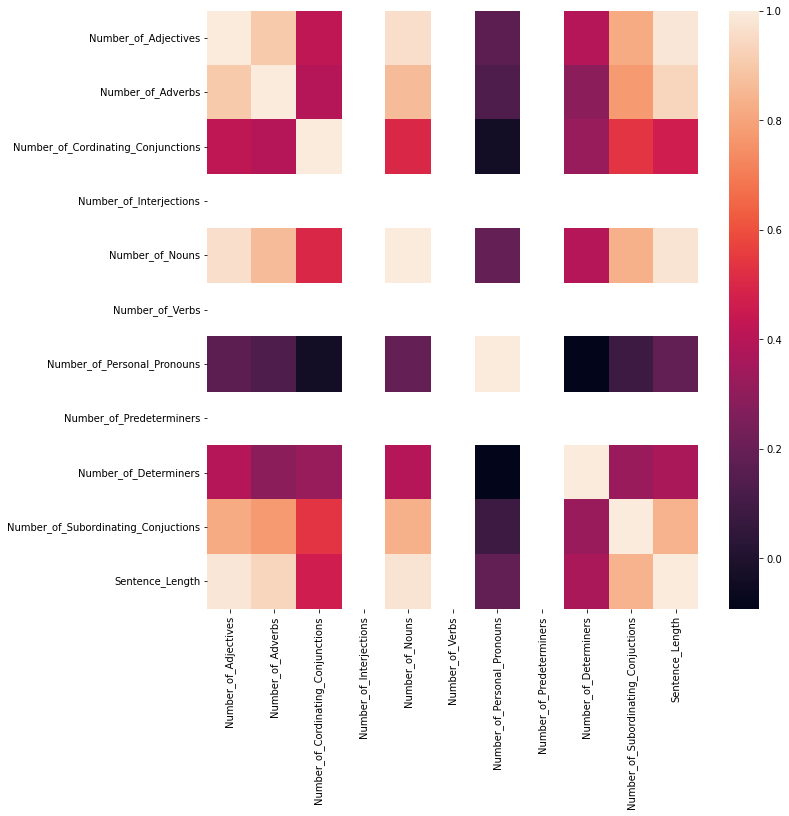

In [24]:
# Visualize Correlated Features
corr = X_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corr)

**Brute Force Method to Find Correlated Features**

In [25]:
# Brute Force Method to find Correlation between features
def correlation(data, threshold=None):
    # Set of all names of correlated columns
    col_corr = set()
    corr_mat = data.corr()
    for i in range(len(corr_mat.columns)):
        for j in range(i):
            if (abs(corr_mat.iloc[i,j]) > threshold):
                colname = corr_mat.columns[i]
                col_corr.add(colname)
    return col_corr

In [26]:
correlated_features = correlation(data=X_train, threshold=0.8)
print(type(correlated_features))
# len(set(correlated_features))
len(correlated_features)

<class 'set'>


4

In [27]:
for item in correlated_features:
  print(item)

Number_of_Adverbs
Number_of_Subordinating_Conjuctions
Number_of_Nouns
Sentence_Length


**RandomForestClassifier**

In [28]:
from sklearn.ensemble import RandomForestClassifier

features = list(correlated_features)
rfc = RandomForestClassifier(n_estimators=20, random_state=101, max_depth=4)
rfc.fit(X_train[features].fillna(0), Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)

In [29]:
# Get Feature Importance using RFC
importance = pd.concat([pd.Series(features), pd.Series(rfc.feature_importances_)], axis=1)
importance.columns = ['feature', 'importance']
importance.sort_values(by='importance', ascending=False)

,feature,importance
3,Sentence_Length,0.436937
2,Number_of_Nouns,0.352832
0,Number_of_Adverbs,0.162837
1,Number_of_Subordinating_Conjuctions,0.047394
